In [0]:
%matplotlib inline

import keras
from keras.utils import to_categorical
from keras import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.models import Model

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import os

In [0]:
def visualize_images(data, labels, predict=None, start=0, cols=4, rows=4, size=10, fontsize=10):
    fig = plt.figure(figsize=(size, size))
    plt.subplots_adjust(bottom=.05, top=.95, hspace=.9)
    
    cols = cols
    rows = rows
    for i in range(1, cols * rows + 1):
        img = data[start + i]
        fig.add_subplot(rows, cols, i)
        plt.imshow(img)
        
        if predict is not None:
            pred = label_names[predict[start + i]]
        else:
            pred = 'NaN'
        real = label_names[int(np.where(labels[start + i] == 1)[0])]
        plt.title('Predict: ' + pred + '\n Real: ' + real, fontsize=fontsize)
    plt.show()

In [0]:
def save_model(model, name, direction):
    save_dir = os.path.join(os.getcwd(), direction)
    model_path = os.path.join(save_dir, name)
    model.save(model_path)

In [0]:
def display_activation(activations, col_size, row_size, act_index): 
    activation = activations[act_index]
    activation_index=0
    fig, ax = plt.subplots(row_size, col_size, figsize=(row_size*2.5,col_size*1.5))
    for row in range(0,row_size):
        for col in range(0,col_size):
            ax[row][col].imshow(activation[0, :, :, activation_index], cmap='gray')
            activation_index += 1

In [0]:
x_train = np.load('Models/x_train.npy')
x_val = np.load('Models/x_val.npy')
y_train = np.load('Models/y_train.npy')
y_val = np.load('Models/y_val.npy')

In [0]:
label_names = [
    'airplane',
    'automobile',
    'bird',
    'cat',
    'deer',
    'dog',
    'frog',
    'horse',
    'ship',
    'truck'
    ]

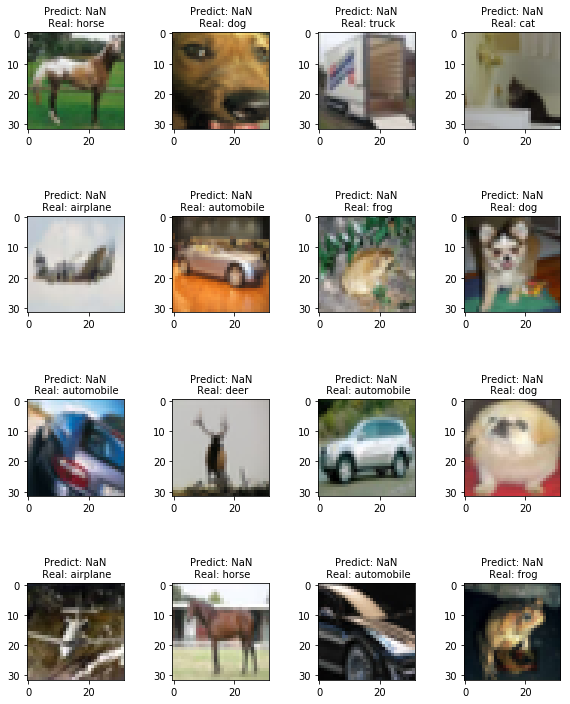

In [41]:
visualize_images(x_val, y_val)

In [0]:
model = Sequential()
num_classes = len(label_names)

In [0]:
# add a Convolutional layer with 32 3x3 filters
model.add(
    Conv2D(
        filters=32,
        kernel_size=(5, 5),
        strides=1,
        input_shape=x_train.shape[1:]
    )
)

# add a relu activation
model.add(
    Activation(
        'relu'
    )
)

# add a maxpooling layer
model.add(
    MaxPooling2D()
)

# add a Convolutional layer
model.add(
    Conv2D(
        filters=64,
        kernel_size=(5,5)
    )
)

# add a relu activation
model.add(
    Activation(
        'relu'
    )
)

# add a convolutional layer
model.add(
    Conv2D(
        filters = 128,
        kernel_size=(3,3)
    )
)

# add a relu
model.add(
    Activation(
        'relu'
    )
)

# add a max pooling
model.add(
  MaxPooling2D()
)

# flatten and dense layers
model.add(
    Flatten()
)

model.add(
    Dense(256)
)

model.add(
    Activation(
        'relu'
    )
)

model.add(
    Dropout(0.5)
)

model.add(
    Dense(num_classes)
)

model.add(
    Activation(
        'softmax'
    )
)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        2432      
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 64)        51264     
_________________________________________________________________
activation_2 (Activation)    (None, 10, 10, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 128)         73856     
_________________________________________________________________
activation_3 (Activation)    (None, 8, 8, 128)         0         
__________

In [0]:
model.compile(
    optimizer='SGD',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [0]:
model.fit(x_train, y_train,
          batch_size=32,
          epochs=2,
          validation_data=(x_val, y_val),
          shuffle=True)

Train on 40000 samples, validate on 10000 samples
Epoch 1/2
40000/40000 [==============================] - 6s 156us/step - loss: 0.7556 - acc: 0.7354 - val_loss: 0.8914 - val_acc: 0.6858
Epoch 2/2
40000/40000 [==============================] - 6s 142us/step - loss: 0.7297 - acc: 0.7453 - val_loss: 0.8967 - val_acc: 0.6857


In [0]:
layer_outputs = [layer.output for layer in model.layers]
activation_model = Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(x_val[1:2])

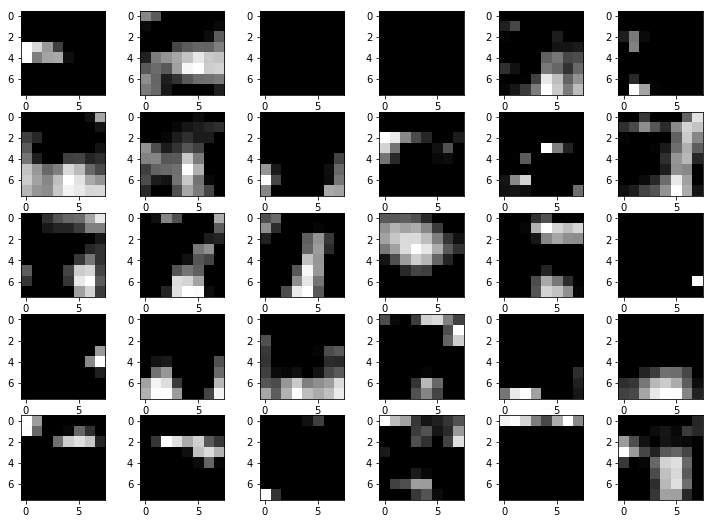

In [0]:
display_activation(activations, 6, 5, 6)

In [0]:
save_model(model, 'prototype', 'Models')

In [0]:
model.layers